In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import mcu
import simple_angles_dataset_generator as simple_angles_gen
import dataset_generator


In [8]:
figure_num = 200
figure_point_cnt = 200
deterministic_param_scatter = False
p = 2
noise_level=0
lw = [40, 0]
up = [120, 45]
param_names = ["Inside angle", "X turn", "Y turn"]
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
# control_vars = np.insert(control_vars, 0, 0, axis=1)
figures = dataset_generator.generate_array_of_figures(control_vars, simple_angles_gen.generate_angles_points, noise_level=noise_level, min_num_points=figure_point_cnt)
k = 6
c = 5000
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, figures, k)

q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


0.006434416610345875


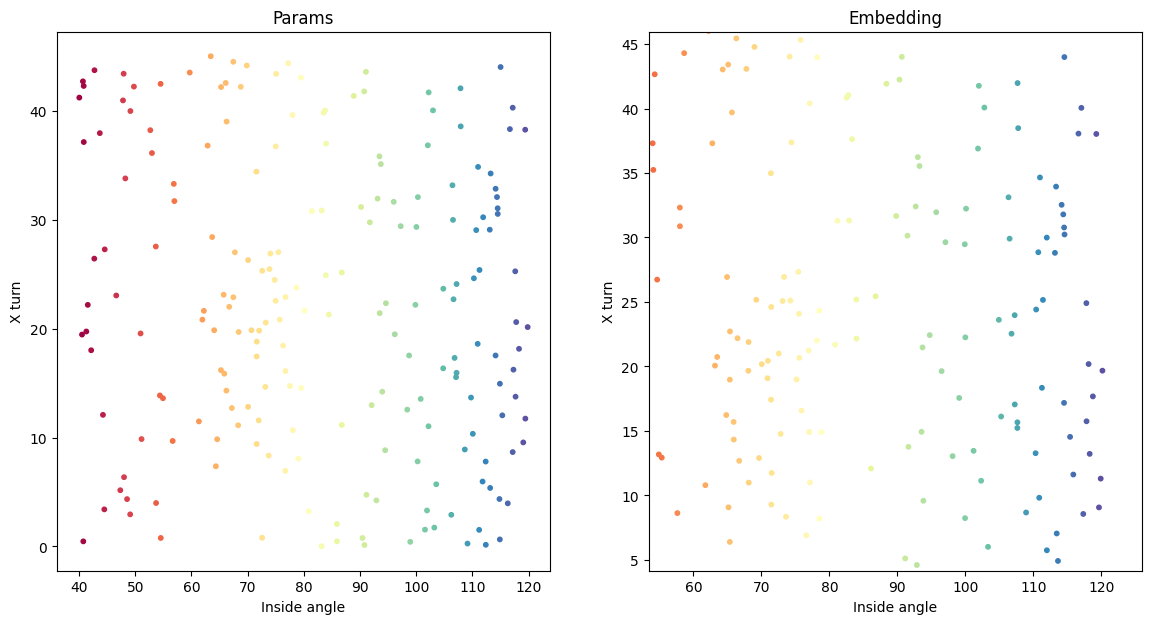

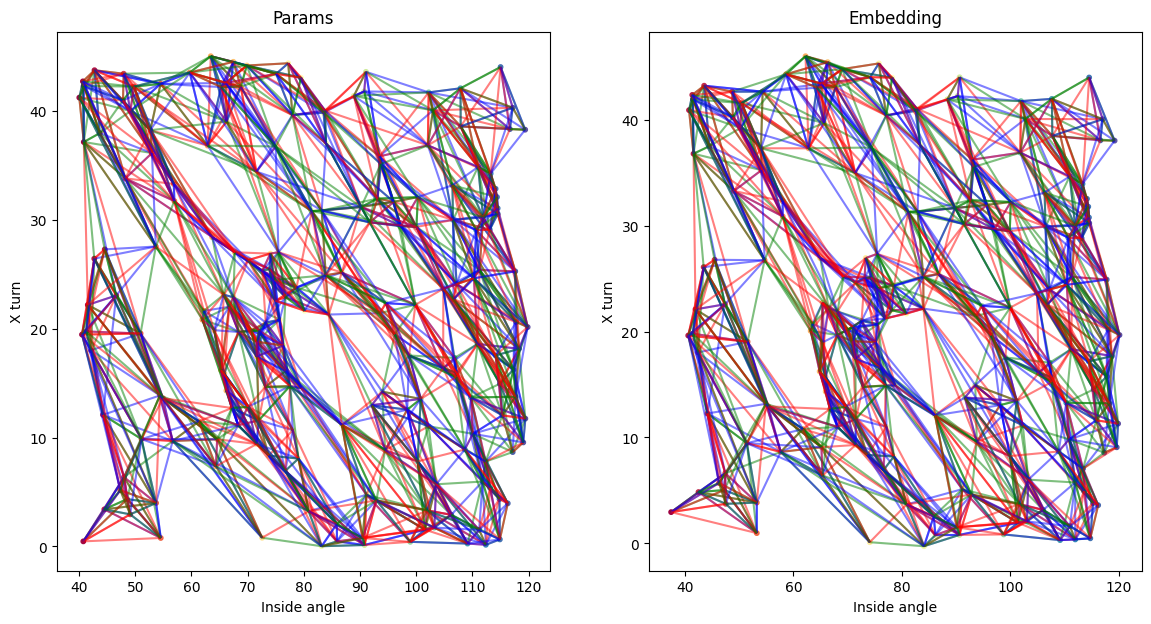

In [9]:
ld_embedding = mcu.reduce_dimensions(q, p)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

ld_embedding_to_params = np.dot(ld_embedding, np.linalg.inv(regression_matrix)) * x_stds + x_means

rre = mcu.compute_rre(ld_embedding_to_params, control_vars)
print(np.median(rre))
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names)
mcu.plot_embeddings_vs_parameters(embedding=ld_embedding_to_params, params=control_vars, param_names=param_names, edges=edges)

-----------
x_opt  = [51.94250687  4.80536162], x_err = 412.1718240524002
x_real = [43.75620986  3.60211836]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 510.3430649170915
x_real = [43.36801307  2.34470345]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 221.58920595386266
x_real = [44.80648282  3.55904603]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 476.2994018585698
x_real = [41.65835307  3.83809402]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 443.88364366374606
x_real = [41.5980862   4.21197841]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 192.05937172999438
x_real = [46.37117783  2.27955542]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 506.6791489094761
x_real = [43.60175534  2.20905131]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 176.1480497323423
x_real = [45.81692732  3.69819546]
-----------
x_opt  = [51.94250687  6.39193545], x_err = 971.8736792562123
x_real = [41.14251007  0.46164481]
-----------
x_op

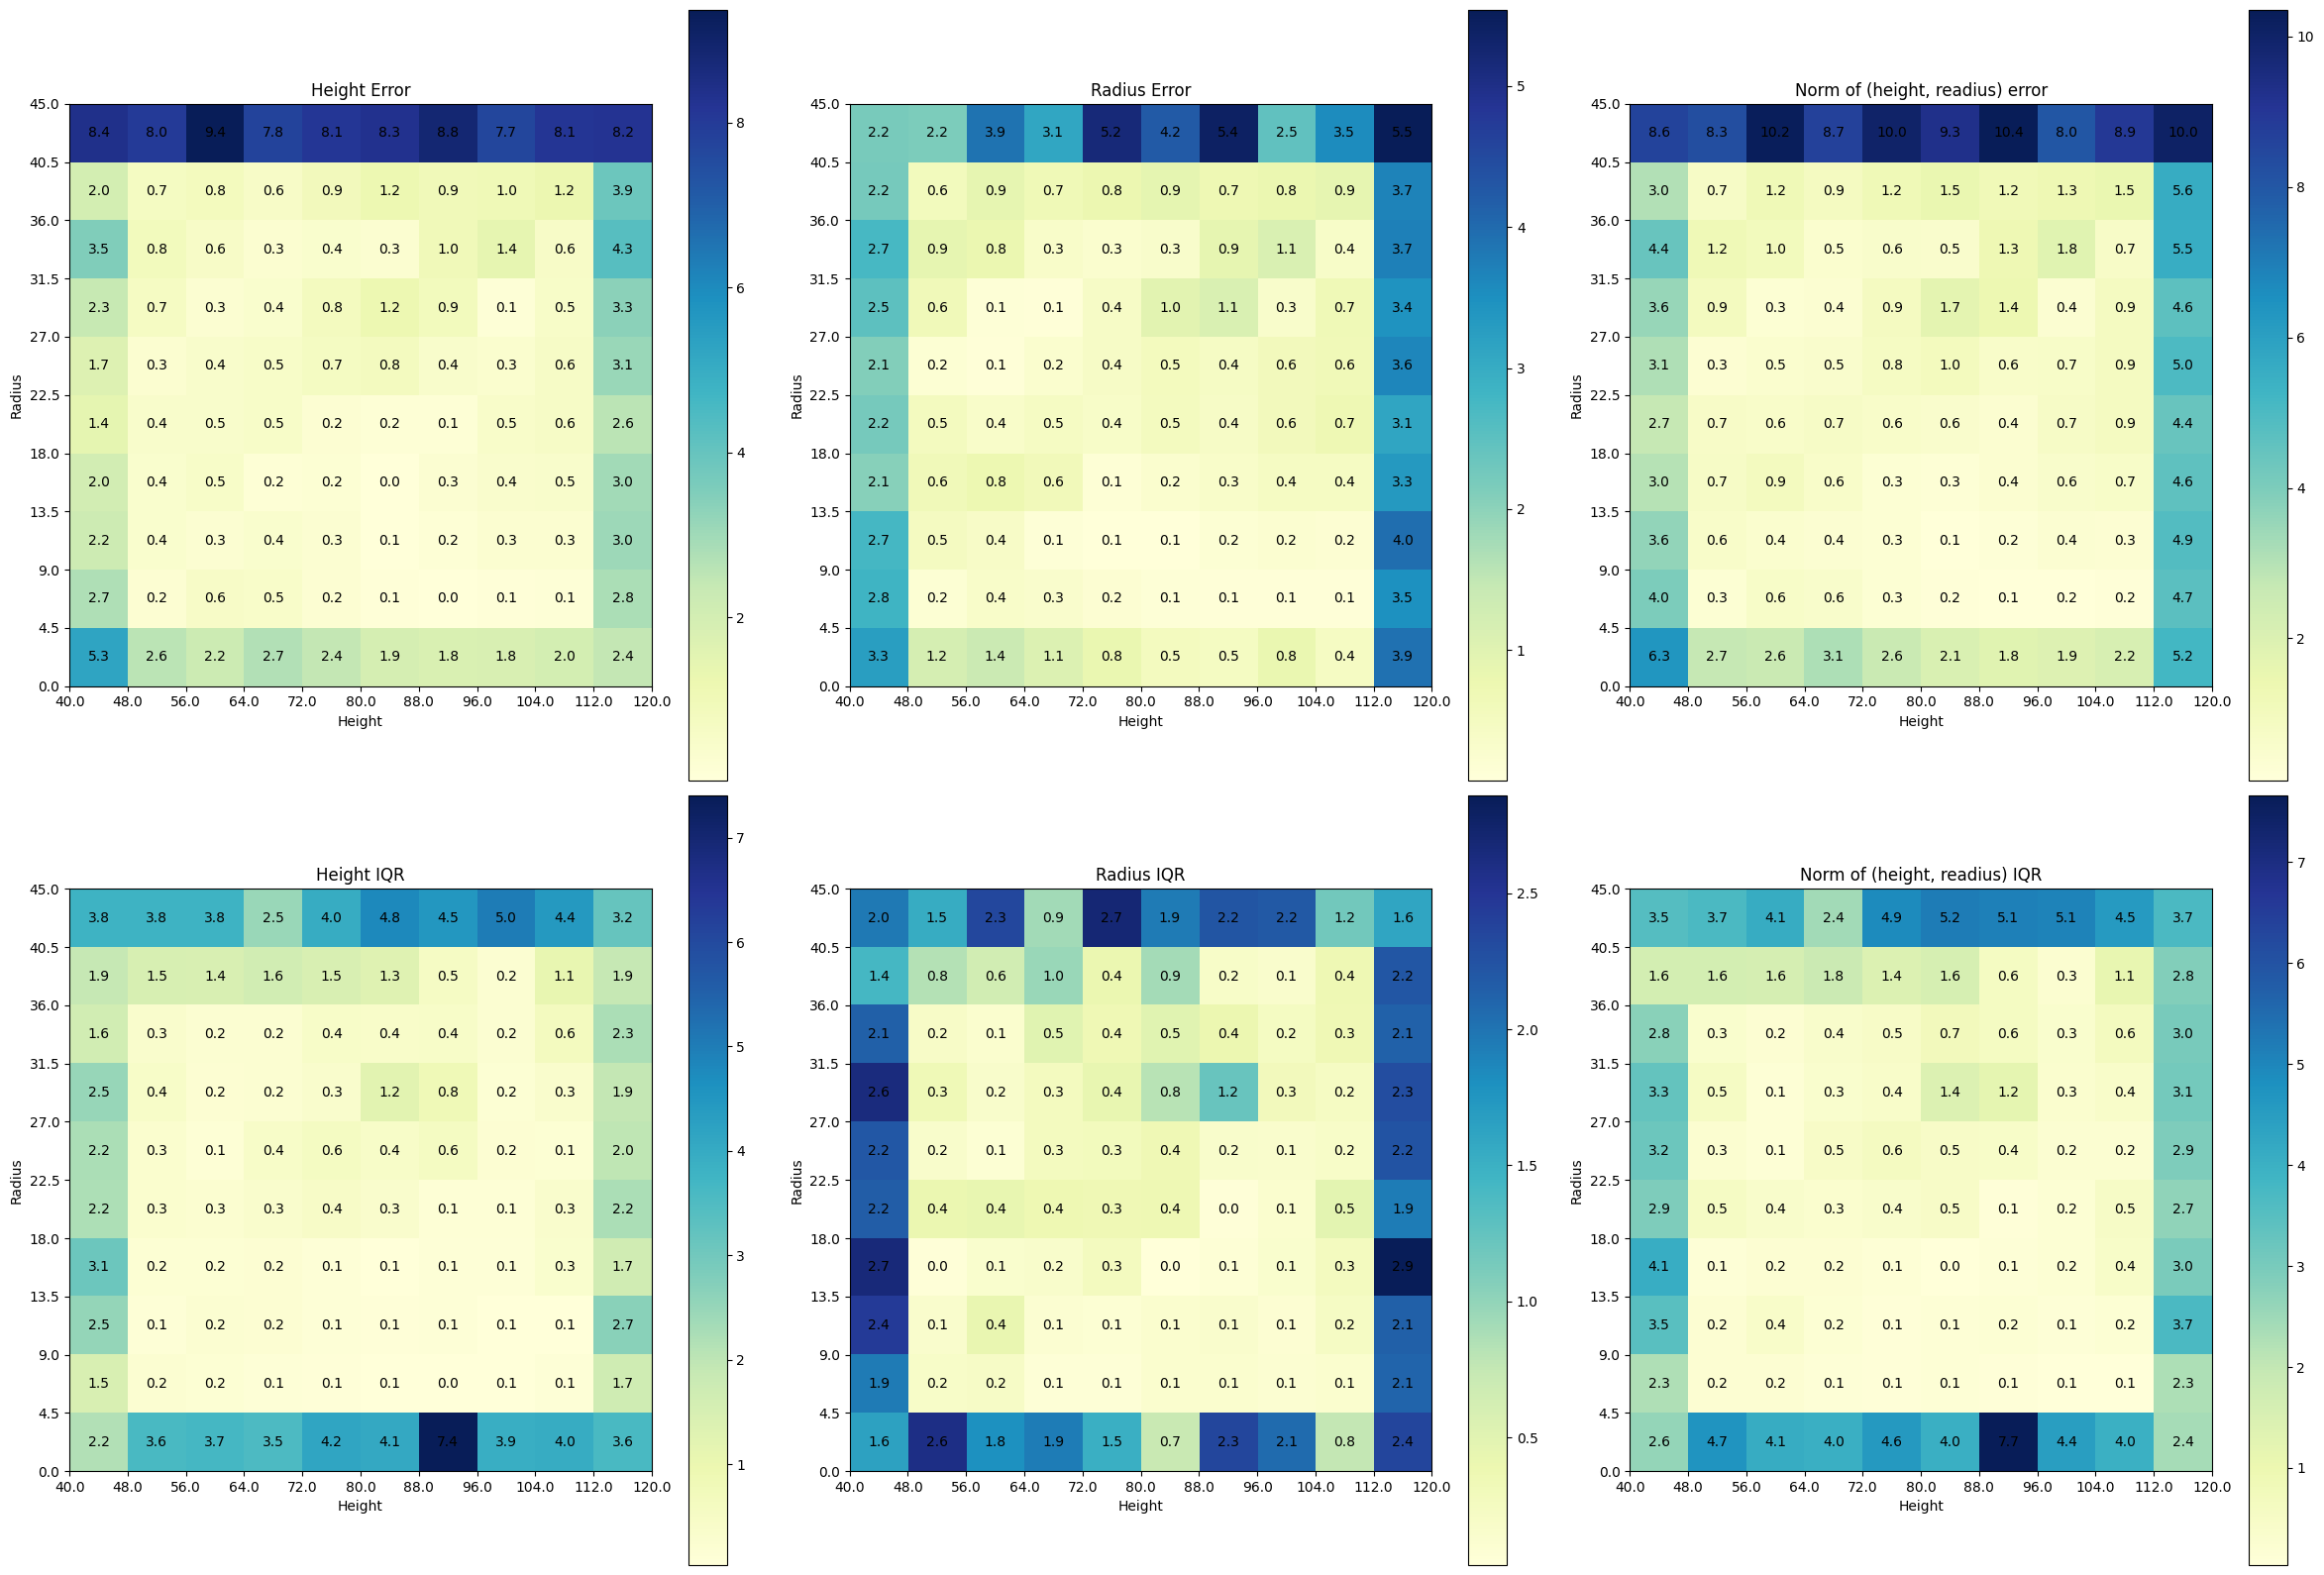

In [10]:
pieces_cnt = 10
test_data_size = 50
noise_level = 0
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, simple_angles_gen.generate_angles_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = False)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)

-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.80536162], x_err = 157.37193086637825
x_real = [48.   4.5]
-----------
x_opt  = [51.94250687  4.805

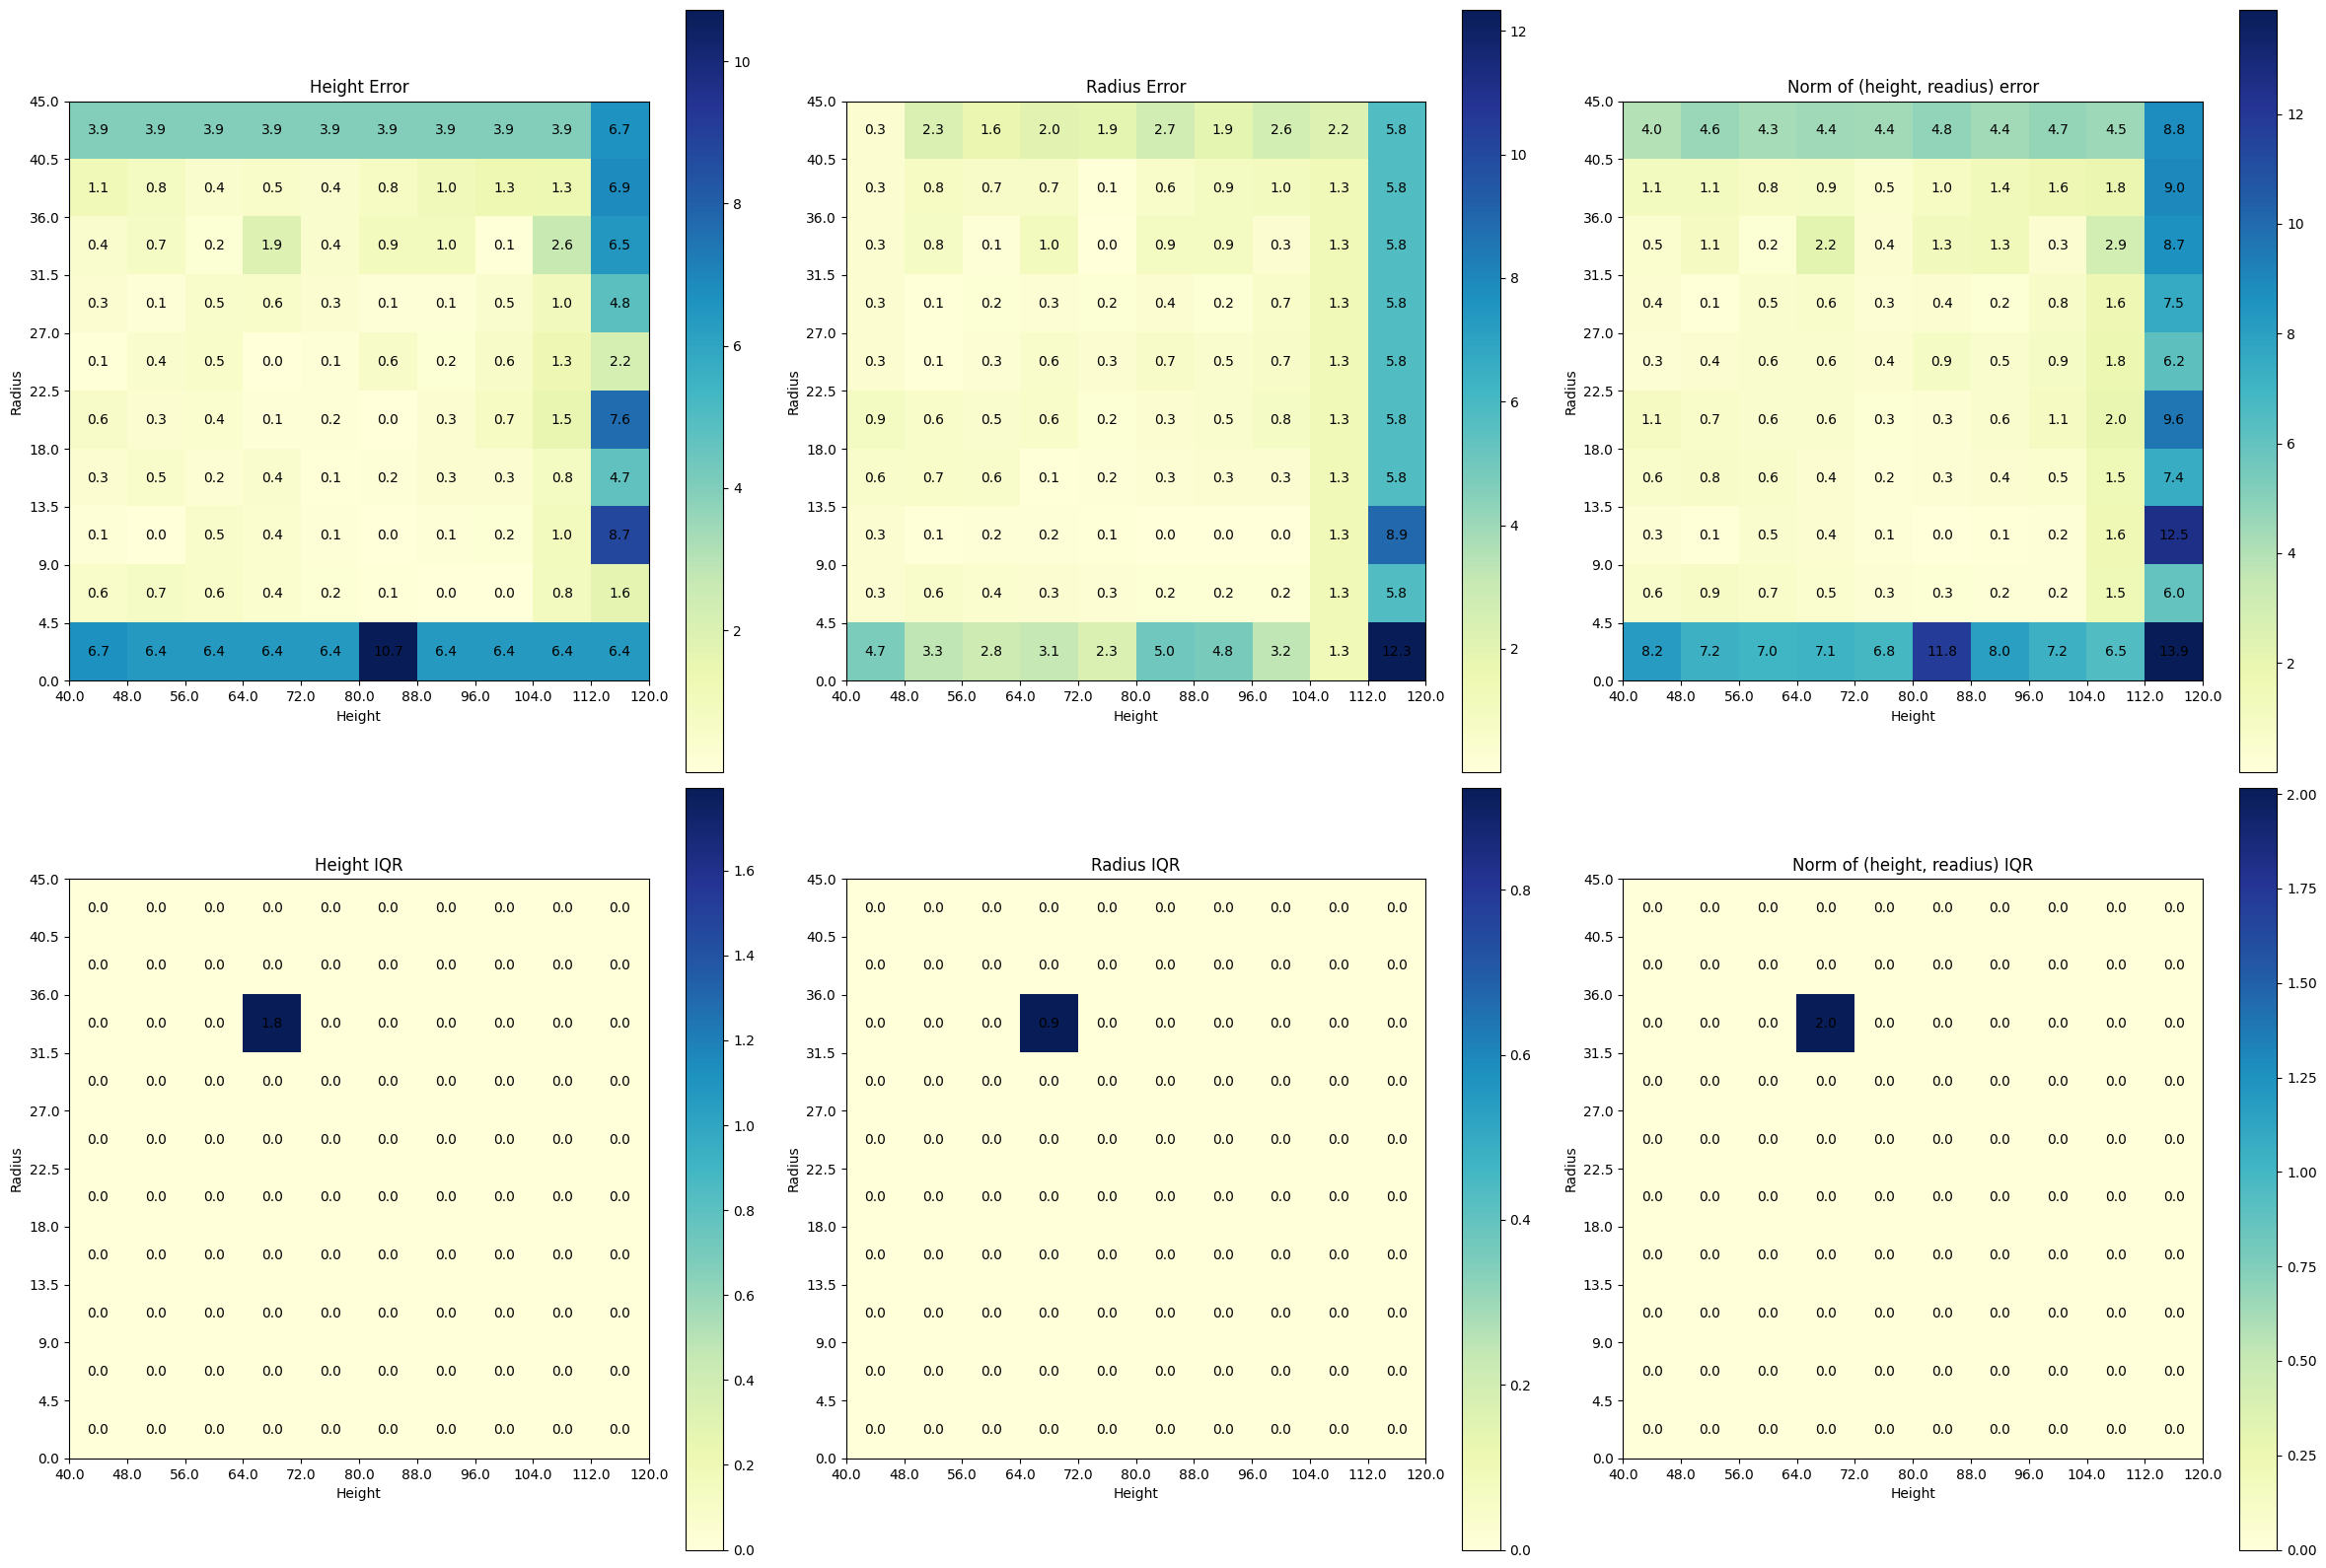

In [11]:
interval_runs = mcu.test_predictive_optimization(lw, up, p, k, simple_angles_gen.generate_angles_points, figure_point_cnt,
                                                 centered_y, ld_embedding, regression_matrix, y_means, y_scaler,
                                                 x_stds, x_means, noise_level, pieces_cnt, test_data_size,
                                                 same_value = True)
mcu.plot_predictive_optimization_heatmaps(lw, up, pieces_cnt, interval_runs)